Regression for target values expected to be a linear combination of the input variables. 

### 1.1.1 Ordinary Least Squares

### sparsity: 
The concept of sparsity is useful in combinatorics and application areas such as network theory, which have a low density of significant data or connections. Large sparse matrices often appear in scientific or engineering applications when solving partial differential equations.

### multicollinearity
In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

### Cross-validation (rotation estimation)
a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (testing dataset).

### Compressed Sensing (compressive sampling or sparse sampling)
 is a signal processing technique for efficiently acquiring and reconstructing a signal, by finding solutions to underdetermined linear systems.
 
 ### Regularization
 is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting
 
 ### Overfitting
 In overfitting, a statistical model describes random error or noise instead of the underlying relationship[citation needed]. Overfitting occurs when a model is excessively complex, such as having too many parameters relative to the number of observations. A model that has been overfitted has poor predictive performance, as it overreacts to minor fluctuations in the training data
 
 ### Underfitting 
 occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Underfitting would occur, for example, when fitting a linear model to non-linear data. Such a model would have poor predictive performance.

In [13]:
from IPython.display import Image

In [1]:
from sklearn import linear_model

In [2]:
reg = linear_model.LinearRegression()
reg.fit ([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
reg.coef_

array([ 0.5,  0.5])

coeff estimates for Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design Matrix X have an appropriate linear dependence, the design matrix becomes close to singular, and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed responsed, which produces a large variance. 

Multicollinearity arises when data is collected without experimental design.

#### Example: 

Automatically created module for IPython interactive environment
('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


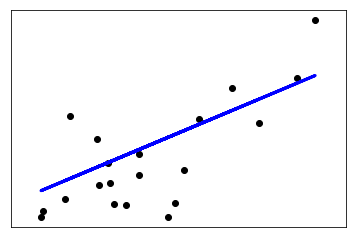

In [4]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### 1.1.2 Ridge Regression

Ridge regression addresses some of the problems of ordinary least squares by imposing a penalty on the size of the coefficients.

In [21]:
Image("http://scikit-learn.org/stable/_images/math/48dbdad39c89539c714a825c0c0d5524eb526851.png")

alpha is a complexity parameter greater than or equal to zero and it controls the amount of shrinkage. The larger alpha is, the greater the shrinkage, which produces coefficients more robust to collinearity. 

In [22]:
from sklearn import linear_model

In [24]:
reg=linear_model.Ridge (alpha = .5)
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
reg.coef_

array([ 0.34545455,  0.34545455])

In [26]:
reg.intercept_

0.13636363636363641

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [33]:
X = 1. /(np.arange(1,11) + np.arange(0,10)[:, np.newaxis])
y = np.ones(10)
print X

[[ 1.          0.5         0.33333333  0.25        0.2         0.16666667
   0.14285714  0.125       0.11111111  0.1       ]
 [ 0.5         0.33333333  0.25        0.2         0.16666667  0.14285714
   0.125       0.11111111  0.1         0.09090909]
 [ 0.33333333  0.25        0.2         0.16666667  0.14285714  0.125
   0.11111111  0.1         0.09090909  0.08333333]
 [ 0.25        0.2         0.16666667  0.14285714  0.125       0.11111111
   0.1         0.09090909  0.08333333  0.07692308]
 [ 0.2         0.16666667  0.14285714  0.125       0.11111111  0.1
   0.09090909  0.08333333  0.07692308  0.07142857]
 [ 0.16666667  0.14285714  0.125       0.11111111  0.1         0.09090909
   0.08333333  0.07692308  0.07142857  0.06666667]
 [ 0.14285714  0.125       0.11111111  0.1         0.09090909  0.08333333
   0.07692308  0.07142857  0.06666667  0.0625    ]
 [ 0.125       0.11111111  0.1         0.09090909  0.08333333  0.07692308
   0.07142857  0.06666667  0.0625      0.05882353]
 [ 0.1111111

In [29]:
n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)

In [30]:
coeffs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    coeffs.append(ridge.coef_)

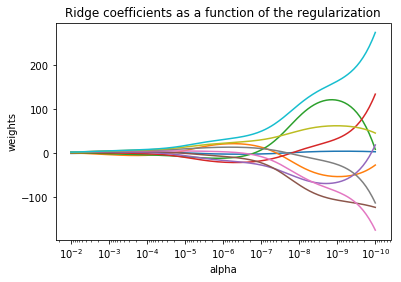

In [36]:
ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 1.1.3 Lasso

Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights

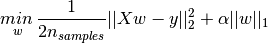

In [34]:
Image('http://scikit-learn.org/stable/_images/math/07c30d8004d4406105b2547be4f3050048531656.png')

In [35]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.predict([[1, 1]])

array([ 0.8])

### 1.1.4 Multi-task Lasso